In [53]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from rnn_model import RNNModel
from time_series_dataset import TimeSeriesDataset
from input_data import InputData
from trainer import Trainer
import numpy as np

In [54]:
data_path = "../../data/trusted/currency_exchange.csv"
scaler = MinMaxScaler()
sequence_length = 8
train_size_proportion = 0.8

In [55]:
input_data = InputData(
    data_path=data_path,
    sequence_length=sequence_length,
    train_size_proportion=train_size_proportion,
    scaler=scaler,
)

In [56]:
X_train, X_test, y_train, y_test = input_data.create_training_and_test_sets()

In [57]:
# Hyperparameters
input_size = 1
hidden_size = 128
output_size = 1
learning_rate = 0.001
num_epochs = 200
batch_size = 10
dropout = 0

In [58]:
# Create data loaders
train_dataset = TimeSeriesDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize the model, loss function, and optimizer
model = RNNModel(input_size, hidden_size, output_size, dropout)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

trainer = Trainer(
    num_epochs=num_epochs,
    optimizer=optimizer,
    criterion=criterion,
    model=model,
    train_loader=train_loader,
    scaler=scaler,
)
trainer.train()

Epoch [1/200], Loss: 0.0024
Epoch [2/200], Loss: 0.0044
Epoch [3/200], Loss: 0.0032
Epoch [4/200], Loss: 0.0025
Epoch [5/200], Loss: 0.0013
Epoch [6/200], Loss: 0.0012
Epoch [7/200], Loss: 0.0015
Epoch [8/200], Loss: 0.0029
Epoch [9/200], Loss: 0.0038
Epoch [10/200], Loss: 0.003
Epoch [11/200], Loss: 0.003
Epoch [12/200], Loss: 0.0014
Epoch [13/200], Loss: 0.0019
Epoch [14/200], Loss: 0.0007
Epoch [15/200], Loss: 0.0011
Epoch [16/200], Loss: 0.001
Epoch [17/200], Loss: 0.0032
Epoch [18/200], Loss: 0.0022
Epoch [19/200], Loss: 0.0032
Epoch [20/200], Loss: 0.0024
Epoch [21/200], Loss: 0.0003
Epoch [22/200], Loss: 0.0019
Epoch [23/200], Loss: 0.0013
Epoch [24/200], Loss: 0.0018
Epoch [25/200], Loss: 0.0008
Epoch [26/200], Loss: 0.0006
Epoch [27/200], Loss: 0.0005
Epoch [28/200], Loss: 0.0011
Epoch [29/200], Loss: 0.0029
Epoch [30/200], Loss: 0.0012
Epoch [31/200], Loss: 0.0007
Epoch [32/200], Loss: 0.0018
Epoch [33/200], Loss: 0.0015
Epoch [34/200], Loss: 0.0022
Epoch [35/200], Loss: 0.00

## Evaluación sobre el conjunto de datos de prueba


In [59]:
result = trainer.evaluate(X_test, y_test)
y_pred = result["y_pred"]
y_test = result["y_test"]

Root Mean Squared Error (RMSE): 0.004753919678835665
Mean Absolute Error (MAE): 0.00
Mean Absolute Percentage Error (MAPE): 0.29%


## Gráficas de los valores predichos vs reales


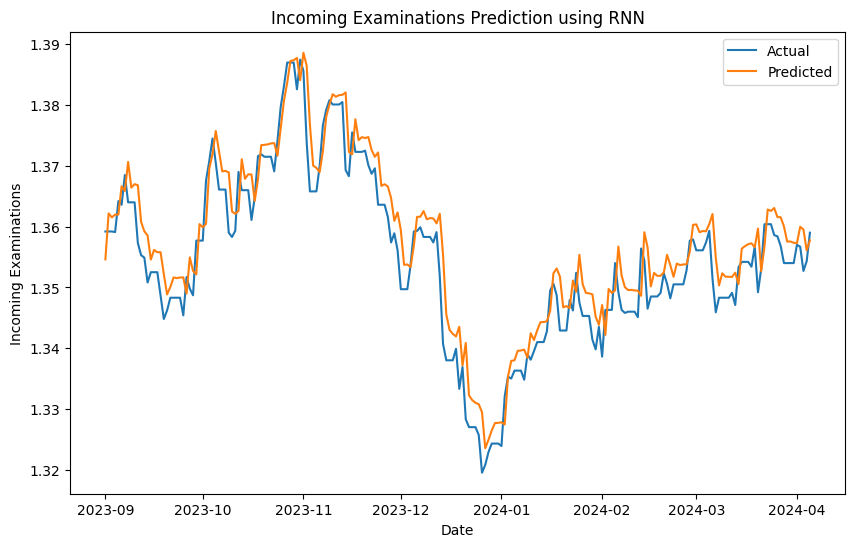

In [60]:
# Visualize predictions against actual data
df = input_data.df
train_size = input_data.train_size
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size + sequence_length :], y_test, label="Actual")
plt.plot(df.index[train_size + sequence_length :], y_pred, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Incoming Examinations")
plt.title("Incoming Examinations Prediction using RNN")
plt.legend()
plt.show()

In [61]:
y_train_model = trainer.model(torch.tensor(X_train, dtype=torch.float32)).detach().numpy()
y_total_pred = np.append(y_train_model, y_pred)
y_total_actual = np.append(y_train, y_test)

In [62]:
len(y_total_pred)

1088

In [63]:
len(y_total_actual)

1088

In [64]:
len(df.index)

1096

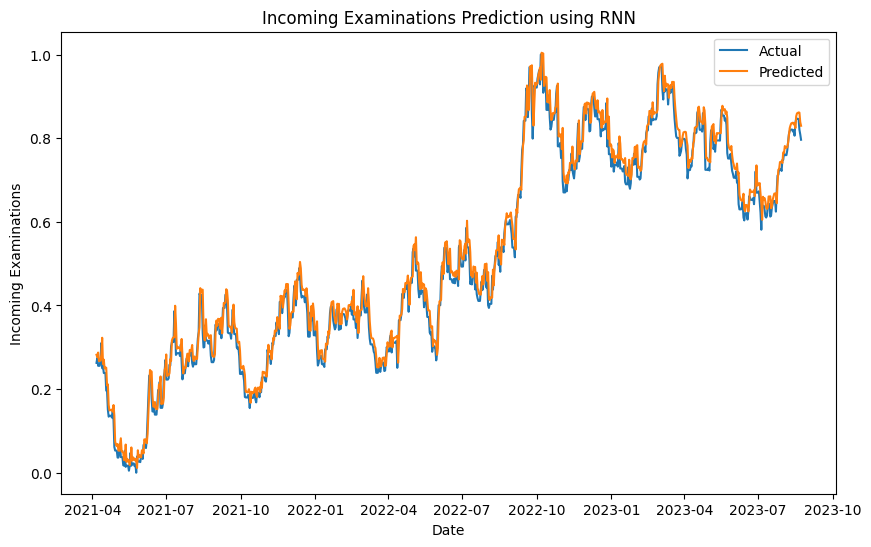

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(df.index[:train_size], y_train, label="Actual")
plt.plot(df.index[:train_size], y_train_model, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Incoming Examinations")
plt.title("Incoming Examinations Prediction using RNN")
plt.legend()
plt.show()

# Conclusiones 


**Precisión de la Predicción**: La gráfica muestra que las predicciones de la RNN (línea naranja) siguen de cerca los valores reales (línea azul). Esto indica que el modelo ha aprendido efectivamente los patrones en los datos históricos y puede generalizar a datos no vistos, lo cual es una buena señal de precisión.

**Rendimiento del Modelo**: El rendimiento parece ser estable a lo largo del tiempo sin ninguna divergencia significativa entre los valores reales y los predichos. No hay señales de sobreajuste o subajuste, ya que los valores predichos no son ni demasiado suaves ni demasiado erráticos en comparación con los valores reales.

**Uso Operacional**: Antes de utilizar este modelo en un entorno de producción o para operaciones de trading reales, sería aconsejable probarlo más, incluyendo pruebas fuera de la muestra durante diferentes condiciones del mercado, para confirmar su robustez y fiabilidad.